In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
submission = pd.read_csv("../input/sample_submission.csv")

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train.head(10)

,id,url,landmark_id
0,cacf8152e2d2ae60,http://static.panoramio.com/photos/original/70...,4676
1,0a58358a2afd3e4e,http://lh6.ggpht.com/-igpT6wu0mIA/ROV8HnUuABI/...,6651
2,6b2bb500b6a38aa0,http://lh6.ggpht.com/-vKr5G5MEusk/SR6r6SJi6mI/...,11284
3,b399f09dee9c3c67,https://lh3.googleusercontent.com/-LOW2cjAqubA...,8429
4,19ace29d77a5be66,https://lh5.googleusercontent.com/-tnmSXwQcWL8...,6231
5,2c9c54b62f0a6a37,https://lh5.googleusercontent.com/-mEaSECO7D-4...,10400
6,0aac70a1de44ced6,http://lh6.ggpht.com/-cJMh9AYQGk8/SOkF_Q5PrjI/...,9779
7,de770bc720f8e714,https://lh4.googleusercontent.com/-Q_FvRlwaaa8...,11288
8,dc9457d703e612ad,https://lh3.googleusercontent.com/-Px33Q-wekRI...,13170
9,3060f5f75d936abb,http://lh3.ggpht.com/-KXyELwqwp_Q/Ry-qmQAqwUI/...,6051


In [5]:
train.describe()

,landmark_id
count,1.225029e+06
mean,7.335493e+03
std,4.026612e+03
min,0.000000e+00
25%,4.083000e+03
50%,7.075000e+03
75%,1.040000e+04
max,1.495000e+04


In [6]:
test.describe()

,id,url
count,117703,117703
unique,117703,117703
top,9e6252ddf0dd95fd,https://lh3.googleusercontent.com/-6d4YOErnDC0...
freq,1,1


In [7]:
test.head()

,id,url
0,000088da12d664db,https://lh3.googleusercontent.com/-k45wfamuhT8...
1,0001623c6d808702,https://lh3.googleusercontent.com/-OQ0ywv8KVIA...
2,0001bbb682d45002,https://lh3.googleusercontent.com/-kloLenz1xZk...
3,0002362830cfe3a3,https://lh3.googleusercontent.com/-N6z79jNZYTg...
4,000270c9100de789,https://lh3.googleusercontent.com/-keriHaVOq1U...


In [8]:
train.isnull().sum()

id             0
url            0
landmark_id    0
dtype: int64

In [9]:
test.isnull().sum()

id     0
url    0
dtype: int64

In [10]:
train_meta = pd.DataFrame(train.landmark_id.value_counts().head(30))
train_meta.reset_index(inplace=True)
train_meta.columns = ['id','count']

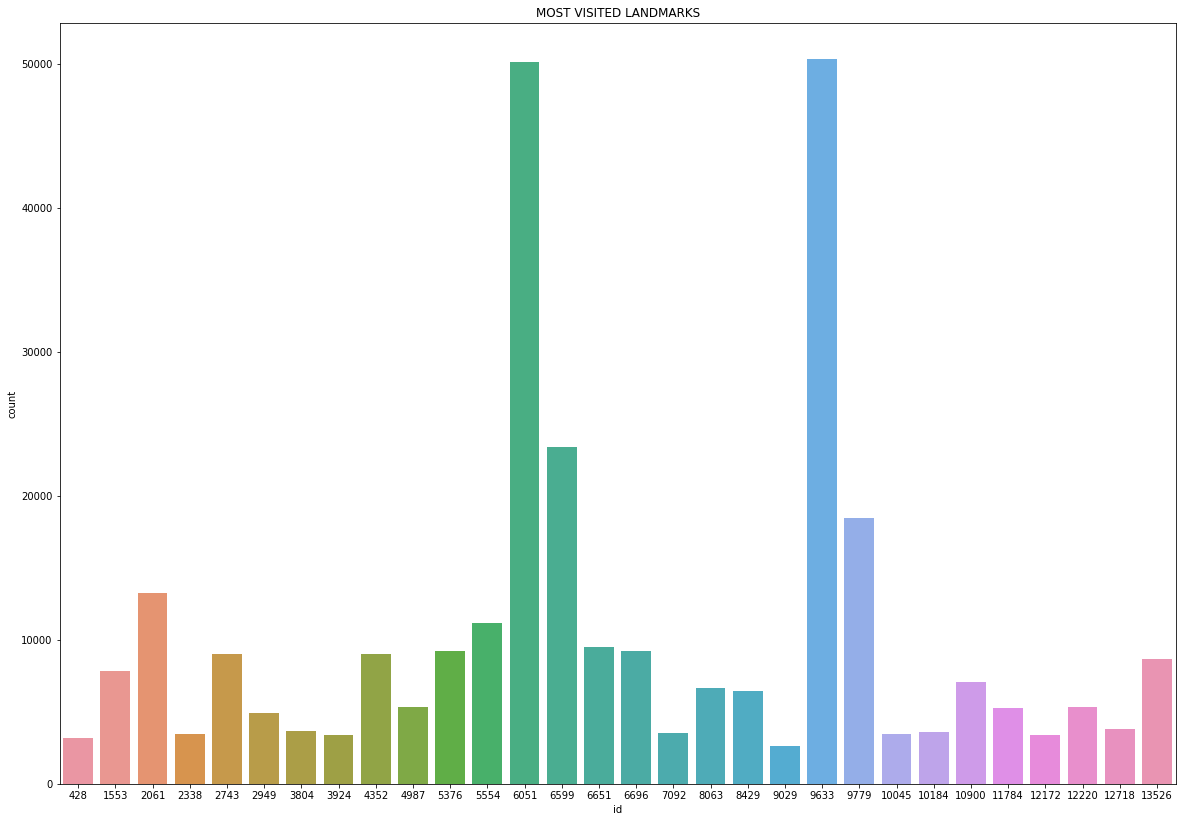

In [11]:
plt.figure(figsize=(20,14))
plt.title("MOST VISITED LANDMARKS")
#sns.jointplot(x="id", y="count", data=train_meta, label="Count",kind='kde', color='red')
sns.barplot(x="id", y="count", data=train_meta, label="Count")
plt.show()

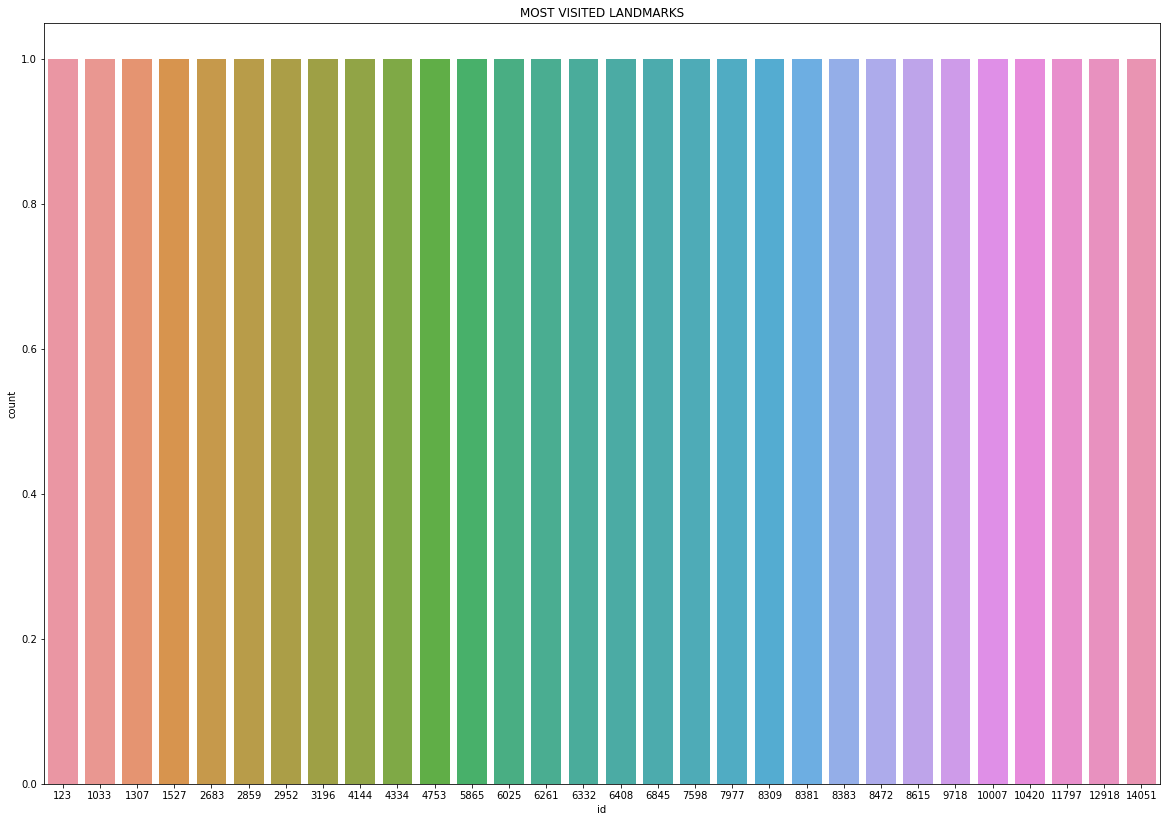

In [12]:
train_meta = pd.DataFrame(train.landmark_id.value_counts().tail(30))
train_meta.reset_index(inplace=True)
train_meta.columns = ['id','count']
plt.figure(figsize=(20,14))
plt.title("MOST VISITED LANDMARKS")
sns.barplot(x="id", y="count", data=train_meta, label="Count")
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


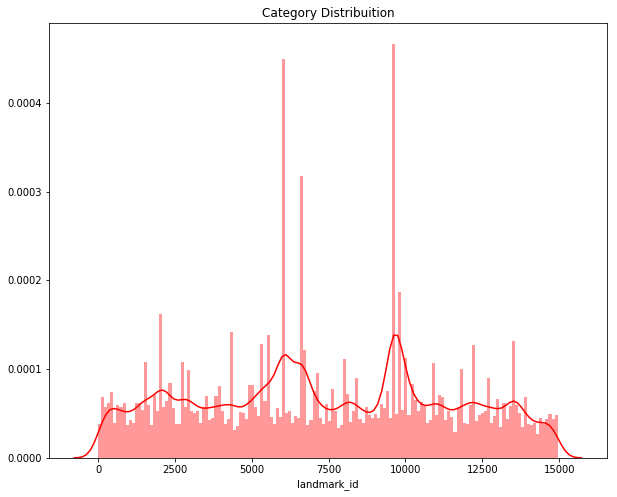

In [13]:
plt.figure(figsize = (10, 8))
plt.title('Category Distribuition')
sns.distplot(train['landmark_id'],color='red', bins=150)
plt.show()

In [14]:
train

,id,url,landmark_id
0,cacf8152e2d2ae60,http://static.panoramio.com/photos/original/70...,4676
1,0a58358a2afd3e4e,http://lh6.ggpht.com/-igpT6wu0mIA/ROV8HnUuABI/...,6651
2,6b2bb500b6a38aa0,http://lh6.ggpht.com/-vKr5G5MEusk/SR6r6SJi6mI/...,11284
3,b399f09dee9c3c67,https://lh3.googleusercontent.com/-LOW2cjAqubA...,8429
4,19ace29d77a5be66,https://lh5.googleusercontent.com/-tnmSXwQcWL8...,6231
5,2c9c54b62f0a6a37,https://lh5.googleusercontent.com/-mEaSECO7D-4...,10400
6,0aac70a1de44ced6,http://lh6.ggpht.com/-cJMh9AYQGk8/SOkF_Q5PrjI/...,9779
7,de770bc720f8e714,https://lh4.googleusercontent.com/-Q_FvRlwaaa8...,11288
8,dc9457d703e612ad,https://lh3.googleusercontent.com/-Px33Q-wekRI...,13170
9,3060f5f75d936abb,http://lh3.ggpht.com/-KXyELwqwp_Q/Ry-qmQAqwUI/...,6051


In [15]:
import os

In [16]:
os.mkdir("hello")

In [17]:
from IPython.display import Image
from IPython.core.display import HTML 

def display_category(urls, category_name):
    img_style = "width: 180px; margin: 0px; float: left; border: 1px solid black;"
    images_list = ''.join([f"<img style='{img_style}' src='{u}' />" for _, u in urls.head(100).iteritems()])
    display(HTML(images_list))

category = train['landmark_id'].value_counts().keys()[60]
urls = train[train['landmark_id'] == category]['url']
display_category(urls, "")   

In [18]:
images_list

NameError: name 'images_list' is not defined